# Projeto Análise e Previsão de Churn Para Manutenção de Clientes

## Descrição
Este projeto de análise de churn tem como objetivo investigar as razões pelas quais os clientes estão cancelando seus cartões de crédito e identificar possíveis soluções para reduzir a taxa de churn da operadora de cartão. A análise de churn é uma ferramenta valiosa para empresas que desejam entender a rotatividade de clientes e, assim, desenvolver estratégias para reter e fidelizar seus clientes. Ao analisar o comportamento dos clientes, o histórico de transações, as interações com a empresa e outros fatores relevantes, a operadora de cartão poderá identificar os principais fatores que estão levando à perda de clientes e implementar medidas para reduzir a taxa de churn. Este projeto também inclui a criação de modelos de previsão de churn, que podem ser usados para prever quais clientes são mais propensos a cancelar seus cartões e permitir que a empresa tome medidas proativas para reter esses clientes antes que eles partam. Com essa análise, a operadora de cartão poderá aprimorar suas estratégias de retenção de clientes, melhorar a satisfação dos clientes e aumentar a rentabilidade a longo prazo.

Os dados utilizados para o projeto foram retirados do site kaggle e o link do bancos de dados é: https://www.kaggle.com/datasets/anwarsan/credit-card-bank-churn

## Dicionário dos Dados
Título | Descrição | Tipo
---|---|---
CLIENTNUM            |     Identificador único de cada cliente| (int)
Attrition_flag        |    Sinalizador que indica se o cliente desistiu ou não| (boolean)
Customer_Age         |     Idade do cliente| (int)
Gender               |     Genêro do cliente| (string)
Dependent_count      |     Número de dependentes que o cliente tem| (int)
Education_Level      |     Nível de educação do cliente| (string)
Marital_Status       |     Estado civil| (string)
Income Category      |     Categoria de renda do cliente| (string)
Card_Category        |     Tipo de cartão do cliente| (string)
Months_on_book       |     Há quanto tempo o cliente está nos livros| (int)
Total_Relationship_Count | Número total de relacionamentos que o cliente tem com a operadora do cartão de crédito| (int)
Months_Inactive_12_mon | Número de meses que o cliente esteve inativo nos últimos doze meses| (int)
Contacts_Count_12_mon  | Número de contatos que o cliente teve nos últimos doze meses| (int)
Credit_Limit  | Limite de crédito do cliente| (int)
Total_Revolving_Bal | Saldo rotativo do cliente| (int)
Avg_Open_To_Buy | Razão média de abertura para compra do cliente| (int)
Total_Amt_Chng_Q4_Q1| Valor total alterado do trimestre 4 para o trimestre 1| (int)
Total_Trans_Amt| Valor total de transação| (int)
Total_Trans_Ct|Contagem total de transações| (int)
Total_Ct_Chng_Q4_Q1| Contagem total alterada do trimestre 4 para o trimestre 1|(int)
Avg_Utilization_Ratio|Taxa média de utilização do cliente|(int)

## Importações

In [1]:
#Bibliotecas para manipulação dos dados
import pandas as pd
import numpy as np

#Bibliotecas para visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

#Bibliotecas para o pré-processamento dos dados
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Bibliotecas para a escolha do modelo preditivo
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#Importação dos modelos preditivos
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#Metricas para avaliação do modelo
from sklearn.metrics import classification_report, confusion_matrix

## Leitura e Carregamento dos Dados
Vamos ler e carregar os dados na variável df, depois vamos ver e analisar o banco de dados, utilizando as funções **.head()**, **.info()** e **.describe()** 

In [2]:
#Leitura dos dados, e carregamento na variável df
df = pd.read_csv('bankchurners2.csv', index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [4]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Análise Explóratoria de Dados (EDA)
Vamos dividir os dados entre númericos e categóricos, para podermos analisar melhor suas distribuicões e relações.

### Dados Númericos

In [3]:
fig = make_subplots(rows=10, cols=1)

fig.add_trace(go.Box(x=df['Customer_Age'], name='Idade do Cliente'), row=1, col=1)
fig.add_trace(go.Box(x=df['Dependent_count'], name='Número de Dependentes'), row=2, col=1)
fig.add_trace(go.Box(x=df['Months_on_book'], name='Tempo nos livros'), row=3, col=1)
fig.add_trace(go.Box(x=df['Total_Relationship_Count'], name='Total de Relacionamentos que o Cliente Tem com a Operadora'), row=4, col=1)
fig.add_trace(go.Box(x=df['Credit_Limit'], name='Limite de Crédito'), row=5, col=1)
fig.add_trace(go.Box(x=df['Total_Revolving_Bal'], name='Saldo Rotativo do Cliente'), row=6, col=1)
fig.add_trace(go.Box(x=df['Avg_Open_To_Buy'], name='Média liberada para compras'), row=7, col=1)
fig.add_trace(go.Box(x=df['Total_Trans_Amt'], name='Valor Total de Transação'), row=8, col=1)
fig.add_trace(go.Box(x=df['Total_Trans_Ct'], name='Contagem Total de Transações'), row=9, col=1)
fig.add_trace(go.Box(x=df['Avg_Utilization_Ratio'], name='Taxa Média de Utilização do Cliente'), row=10, col=1)

fig.update_layout(height=700)


A partir do gráfico acima podemos tirar algumas conclusões a respeito dos dados:
- A média de idade dos clientes gira em torno de 46 anos.
- Cada cliente tem em média 2 dependentes.
- Os clientes estão em média 3 anos nos livros.
- Cada cliente usa em média 4 serviços da operadora.
- A maioria do limite de crédito dos clientes está abaixo de 10k, porém há um número menor de clientes com o limite acima de 24k.
- O saldo rotativo dos clientes é em média 1276.
- Cada cliente tem em média 3474 liberados para compras.
- Cada cliente faz em média 76 transações.

Vamos transformar a variável **'Attrition_Flag'** em binário para podermos analisar a sua correlação com as outras variáveis, além disso, ela será a nossa variável 'target' em nosso modelo preditivo.

In [4]:
#Cria a função de transformação
def binary_attrition_flag(data):
    #Se o dado for positivo para a existência do cliente retorna 0, se não, retorna1
    if data == 'Existing Customer':
        return 0
    else:
        return 1
    
#Aplicando a função e criando uma nova coluna com a variável target já transformada
df['Attrition_Flag'] = df['Attrition_Flag'].apply(binary_attrition_flag)
df['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [10]:
df.corr()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11460\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,-0.046430,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Attrition_Flag,-0.046430,1.000000,0.018203,0.018991,0.013687,-0.150005,0.152449,0.204491,-0.023873,-0.263053,-0.000285,-0.131063,-0.168598,-0.371403,-0.290054,-0.178410
Customer_Age,0.007613,0.018203,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,0.018991,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.013687,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.150005,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.152449,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,0.204491,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,-0.023873,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,-0.263053,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022


Pela tabela de correlações acima poder concluir que as variáveis que mais se correlacionam com nossa variável target são:
- **Months_Inactive_12_mon**
- **Contacts_Count_12_mon**
- **Total_Revolving_Bal**
- **Total_Trans_Amt**
- **Total_Trans_Ct**

Vamos plotar um gráfico para analisarmos a relação entre a variável target e a variável 'Total_Trans_Ct'

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125]),
 [Text(0, 0, '10'),
  Text(1, 0, '11'),
  Text(2, 0, '12'),
  Text(3, 0, '13'),
  Text(4, 0, '14'),
  Text(5, 0, '15'),
  Text(6, 0, '16'),
  Text(7, 0, '17'),
  Text(8, 0, '18'),
  Text(9, 0, '19'),
  Text(10, 0, '20'),
  Text(11, 0, '21'),
  Text(12, 0, '22'),
  Text(13, 0, '23'),
  Te

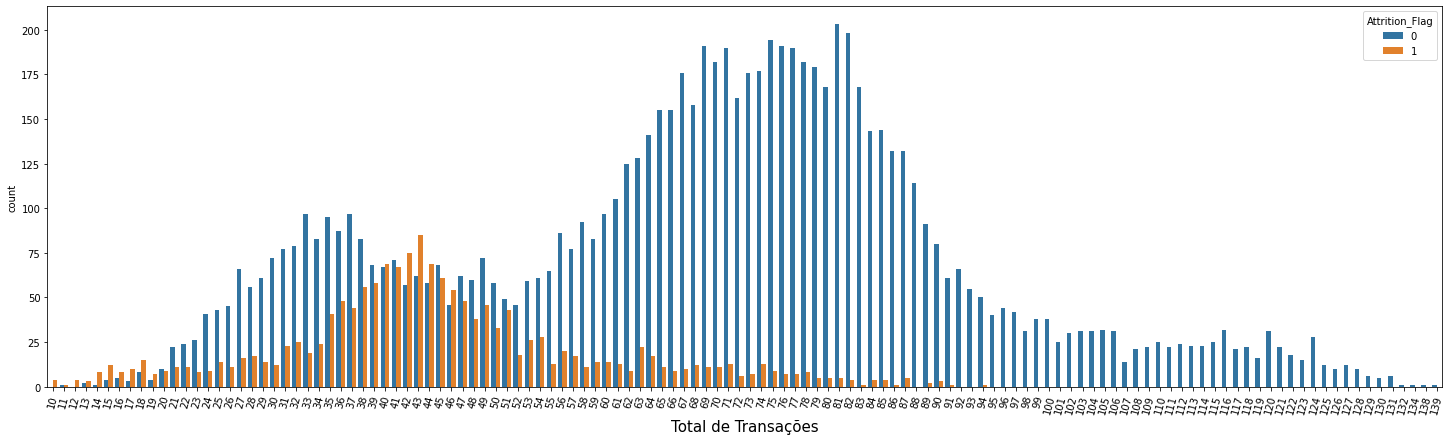

In [11]:
plt.figure(figsize=(25, 7))
sns.countplot(x='Total_Trans_Ct', data=df, hue='Attrition_Flag')
plt.xlabel('Total de Transações', size=15)
plt.xticks(rotation=75)

Pelo gráfico acima, os clientes que fazem de 30 a 55 transações tem maiores índices de cancelamento do cartão, isso poderia indicar uma área de risco, e quando o cliente chegar nela, a operadora pode tomar ações para mantê-lo. 

Agora vamos analisar a variável 'Months_Inactive_12_mon', para analisar se há alguma correlação com o cancelamento.

Text(0.5, 0, 'Doze meses inativo')

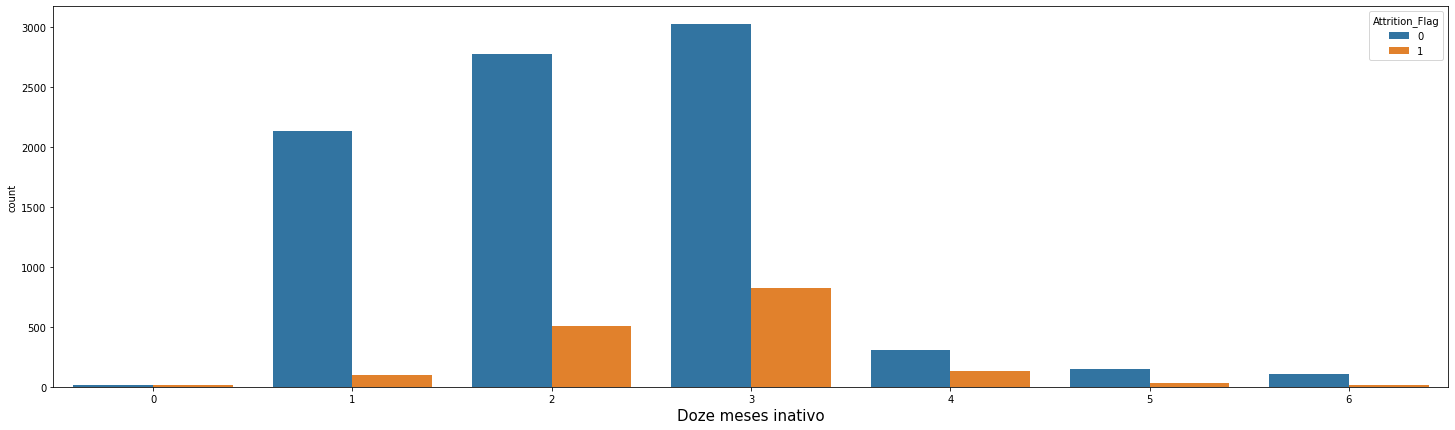

In [12]:
plt.figure(figsize=(25, 7))
sns.countplot(x='Months_Inactive_12_mon', data=df, hue='Attrition_Flag')
plt.xlabel('Doze meses inativo', size=15)
#plt.xticks(rotation=75)

Pela distribuição do gráfico acima, não há uma correlação entre a variável e o índice de cancelamento.

Vamos analisar também a variável 'Contacts_Count_12_mon'

Text(0.5, 0, 'Contatos em 12 meses')

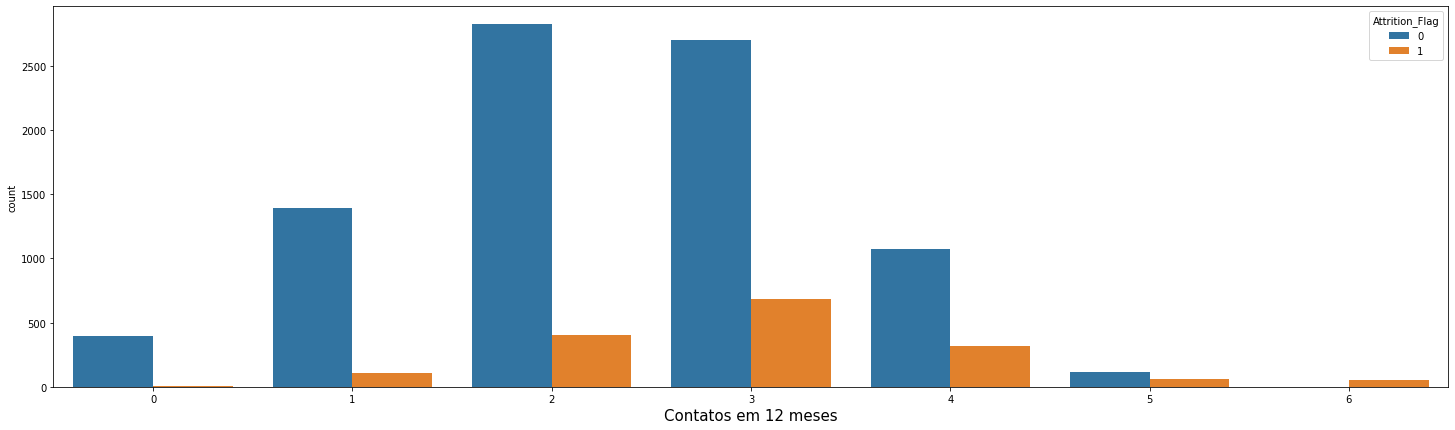

In [13]:
plt.figure(figsize=(25, 7))
sns.countplot(x='Contacts_Count_12_mon', data=df, hue='Attrition_Flag')
plt.xlabel('Contatos em 12 meses', size=15)
#plt.xticks(rotation=75)

Também não há uma correlação visível entre a variável e o índice de cancelamento.

Agora vamos dividir, o saldo rotativo do cliente em categorias, para analisar a correlação com o índice de desistência

In [5]:
#Cria a função para dividir o saldo rotativo
def revolving_bal_divisor(data):
    if data < 462:
        return 'low revolving bal'
    elif 462 <= data <= 2090:
        return 'medium revolving bal'
    else:
        return 'high revolving bal'

#Cria uma nova coluna para o saldo rotativo já dividido
df['new_revolving_bal'] = df['Total_Revolving_Bal'].apply(revolving_bal_divisor)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,new_revolving_bal
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,medium revolving bal
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,medium revolving bal
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,low revolving bal
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,high revolving bal
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,low revolving bal


Text(0.5, 0, 'Saldo Rotativo')

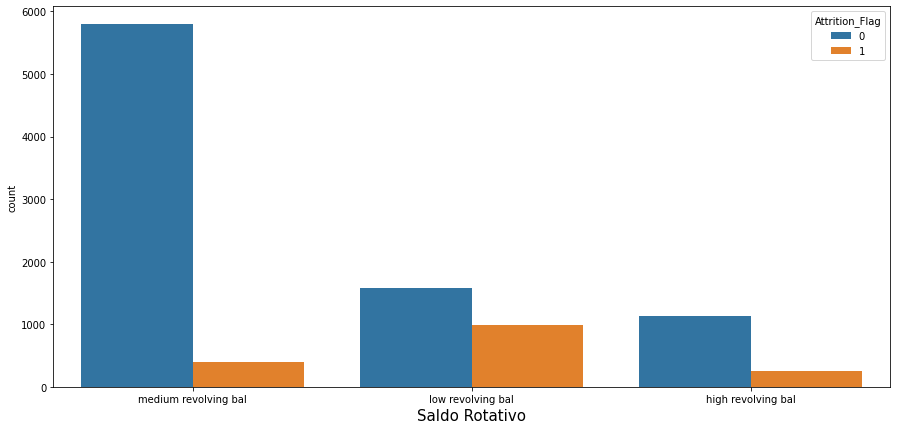

In [17]:
plt.figure(figsize=(15, 7))
sns.countplot(x='new_revolving_bal', data=df, hue='Attrition_Flag')
plt.xlabel('Saldo Rotativo', size=15)
#plt.xticks(rotation=75)

Já no saldo rotativo, podemos observar que clientes com baixo saldo rotativo, tem mais índices de cancelamento.

## Pré-Processamento dos Dados

Primeiro vamos excluir do dataset, as colunas que não farão parte do nosso modelo preditivo.

In [6]:
df.drop(['CLIENTNUM', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1'], axis=1, inplace=True)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,new_revolving_bal
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1144,42,0.061,medium revolving bal
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1291,33,0.105,medium revolving bal
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,1887,20,0.000,low revolving bal
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1171,20,0.760,high revolving bal
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,816,28,0.000,low revolving bal


Vamos fazer o **OneHotEncolder** para transformar as nossas variáveis categoricas em númericas e assim, poder utiliza-las no nosso modelo preditivo.

##### One Hot Encolder

In [18]:
encolder = LabelEncoder()

for coluna in ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'new_revolving_bal']:
    df[coluna] = encolder.fit_transform(df[coluna])

In [19]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,new_revolving_bal
0,0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1144,42,0.061,2
1,0,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1291,33,0.105,2
2,0,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,1887,20,0.000,1
3,0,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1171,20,0.760,0
4,0,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,816,28,0.000,1


Vamos fazer a normalização dos dados, para coloca-los em uma mesma escala, evitando asssim, que o nosso modelo preditivo dê diferentes pesos para as variáveis.

#### Divisão dos Dados

In [20]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [21]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

##### Normalização dos Dados

c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:470: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Attrition_Flag'),
  Text(1, 0, 'Customer_Age'),
  Text(2, 0, 'Gender'),
  Text(3, 0, 'Dependent_count'),
  Text(4, 0, 'Education_Level'),
  Text(5, 0, 'Marital_Status'),
  Text(6, 0, 'Income_Category'),
  Text(7, 0, 'Card_Category'),
  Text(8, 0, 'Months_on_book'),
  Text(9, 0, 'Total_Relationship_Count'),
  Text(10, 0, 'Months_Inactive_12_mon'),
  Text(11, 0, 'Contacts_Count_12_mon'),
  Text(12, 0, 'Credit_Limit'),
  Text(13, 0, 'Total_Revolving_Bal'),
  Text(14, 0, 'Avg_Open_To_Buy'),
  Text(15, 0, 'Total_Trans_Amt'),
  Text(16, 0, 'Total_Trans_Ct'),
  Text(17, 0, 'Avg_Utilization_Ratio')])

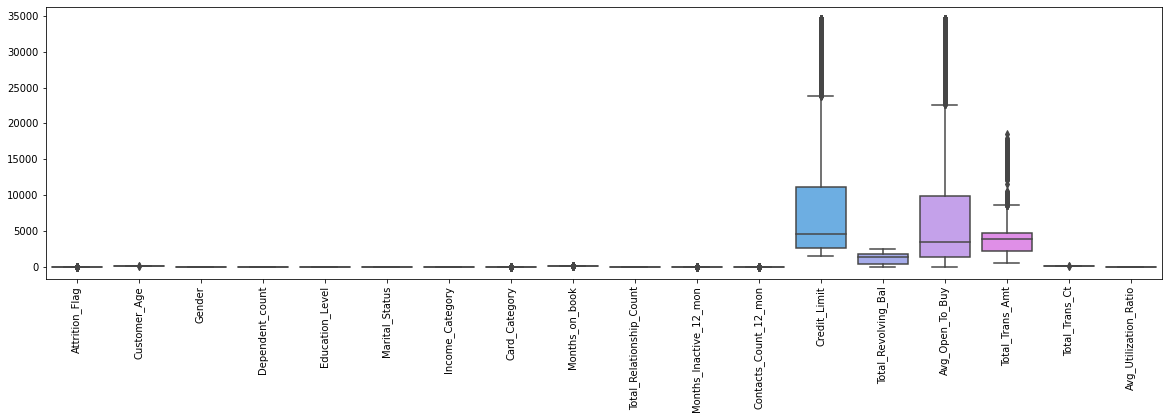

In [24]:
plt.figure(figsize=(20, 5))
sns.boxplot(df)
plt.xticks(rotation=90)

In [22]:
#Normaliza os dados e coloca na variável 'df_normalizado'
df_normalizado = MinMaxScaler().fit_transform(X_treino)

In [23]:
#Cria um dataset com os valores normalizados
df_normalizado = pd.DataFrame(df_normalizado, columns=df.drop('Attrition_Flag', axis=1).columns)
df_normalizado['Attrition_Flag'] = df['Attrition_Flag']
df_normalizado.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio,new_revolving_bal,Attrition_Flag
0,0.553191,1.0,0.4,0.333333,0.333333,0.6,0.0,0.558140,0.0,0.500000,0.166667,1.000000,0.543901,0.960334,0.402526,0.558140,0.040040,1.0,0
1,0.617021,0.0,0.4,1.000000,0.333333,0.8,0.0,0.558140,0.4,0.500000,0.166667,0.030676,0.384585,0.042940,0.095026,0.310078,0.395395,1.0,0
2,0.404255,1.0,0.4,1.000000,0.333333,0.6,0.0,0.534884,0.8,0.333333,0.500000,0.533916,1.000000,0.480370,0.240737,0.519380,0.132132,0.0,0
3,0.723404,1.0,0.0,1.000000,0.333333,0.4,0.0,0.790698,0.8,0.166667,0.500000,0.093800,0.411998,0.101440,0.129020,0.263566,0.228228,1.0,0
4,0.595745,0.0,0.2,0.500000,0.333333,0.8,0.0,0.674419,0.4,0.833333,0.666667,0.031311,0.611442,0.027004,0.243352,0.542636,0.622623,1.0,0


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Customer_Age'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'Dependent_count'),
  Text(3, 0, 'Education_Level'),
  Text(4, 0, 'Marital_Status'),
  Text(5, 0, 'Income_Category'),
  Text(6, 0, 'Card_Category'),
  Text(7, 0, 'Months_on_book'),
  Text(8, 0, 'Total_Relationship_Count'),
  Text(9, 0, 'Months_Inactive_12_mon'),
  Text(10, 0, 'Contacts_Count_12_mon'),
  Text(11, 0, 'Credit_Limit'),
  Text(12, 0, 'Total_Revolving_Bal'),
  Text(13, 0, 'Avg_Open_To_Buy'),
  Text(14, 0, 'Total_Trans_Amt'),
  Text(15, 0, 'Total_Trans_Ct'),
  Text(16, 0, 'Avg_Utilization_Ratio'),
  Text(17, 0, 'new_revolving_bal'),
  Text(18, 0, 'Attrition_Flag')])

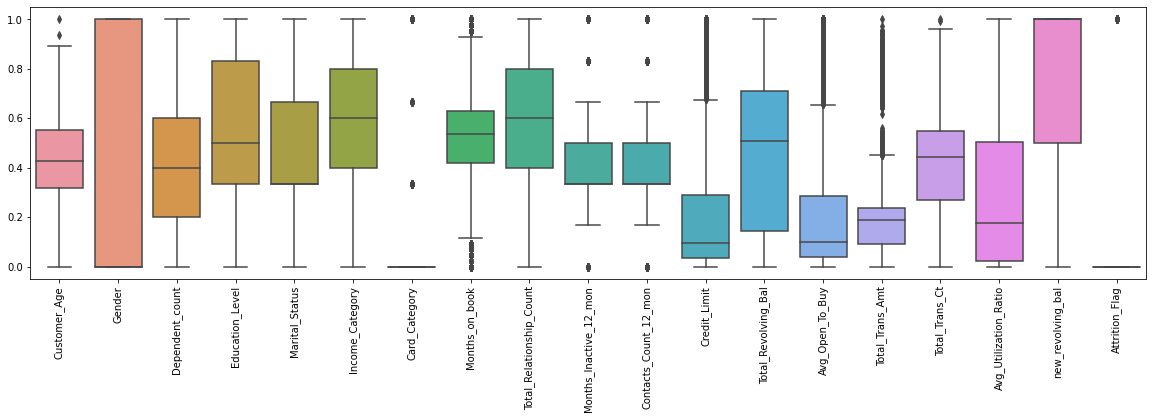

In [11]:
plt.figure(figsize=(20, 5))
sns.boxplot(df_normalizado)
plt.xticks(rotation=90)

### Balanceamento de Classe

Podemos notar que as classes estão desbalanceadas, iremos balcea-las, para evitar que o nosso modelo 'chute' aquela classe maior, dando assim uma falsa impressão que ele performou bem, overfittando o nosso modelo.

<AxesSubplot: xlabel='Attrition_Flag', ylabel='count'>

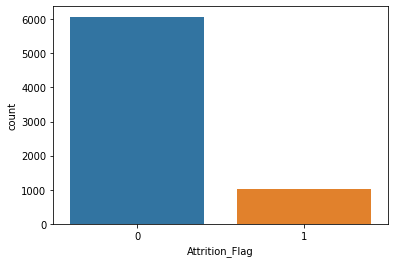

In [28]:
sns.countplot(x='Attrition_Flag', data=df_normalizado)

In [25]:
smote = SMOTE()
X_treino, y_treino = smote.fit_resample(X_treino, y_treino)

<AxesSubplot: xlabel='Attrition_Flag', ylabel='count'>

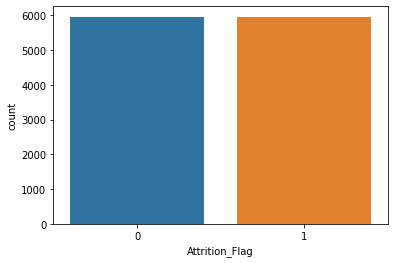

In [27]:
sns.countplot(x=y_treino)

#### Criação dos modelos

Iremos testar dois modelos:
- **RandomForestClassifier**: é um método ensemble para classificação , regressão e outras tarefas que opera construindo uma infinidade de árvores de decisão no momento do treinamento. Para tarefas de classificação, a saída da floresta aleatória é a classe selecionada pela maioria das árvores. Florestas de decisão aleatórias corrigem o hábito das árvores de decisão de sobreajustar seu conjunto de treinamento.
- **XGBoostClassifier**: é uma biblioteca otimizada de aumento de gradiente distribuída projetada para ser altamente eficiente , flexível e portátil . Ele implementa algoritmos de aprendizado de máquina sob a estrutura Gradient Boosting . O XGBoost fornece um aumento de árvore paralela (também conhecido como GBDT, GBM) que resolve muitos problemas de ciência de dados de maneira rápida e precisa. 

In [29]:
random_forest_classifier = RandomForestClassifier()
xbg_classifier = xgb.XGBClassifier()

## Métricas
#### F1
A métrica **F1** é uma medida comum de avaliação de desempenho em modelos de classificação binária. Ela é uma média harmônica entre **precisão** (a proporção de verdadeiros positivos entre todas as previsões positivas) e **recall** (a proporção de verdadeiros positivos entre todas as amostras verdadeiramente positivas). A justificativa para a utilização da métrica F1 é que ela considera tanto a precisão quanto o recall do modelo em conjunto, em vez de avaliá-los separadamente. Isso é importante porque, em nossa aplicação, tanto a precisão quanto o recall são igualmente importantes.

##### Validação Cruzada
A validação cruzada é uma técnica de avaliação de modelos que divide o conjunto de dados em subconjuntos de treinamento e validação, permitindo que o modelo seja avaliado várias vezes em diferentes subconjuntos e reduzindo o risco de sobreajuste. Ela fornece uma avaliação mais precisa e robusta do desempenho do modelo. Ao dividir o conjunto de dados em vários subconjuntos de treinamento e validação, a validação cruzada permite que o modelo seja treinado em diferentes combinações de dados, reduzindo a probabilidade de que o modelo se ajuste excessivamente a um conjunto específico de dados. Além disso, a validação cruzada também ajuda a evitar a influência de escolhas arbitrárias no processo de divisão entre dados de treinamento e teste, que pode levar a uma avaliação enviesada do modelo. Por exemplo, se os dados de teste forem selecionados aleatoriamente, pode haver a possibilidade de que alguns pontos de dados importantes sejam incluídos apenas em dados de treinamento ou apenas em dados de teste, o que pode levar a uma avaliação não realista do desempenho do modelo.

In [30]:
#Divide os nossos dados em folds de 10 partes
kfold = KFold(n_splits=10)
#Aplica a validação cruzada e treina o modelo nos dados de treino, já utilizando a métrica f1
f1score_random_forest = cross_val_score(random_forest_classifier, X_treino, y_treino, cv=kfold, scoring='f1')
f1score_xbg = cross_val_score(random_forest_classifier, X_treino, y_treino, cv=kfold, scoring='f1')

Agora vamos analisar a perfomace do f1 do modelo em cada split, e depois a média geral do modelo.

In [31]:
f1score_random_forest

array([0.8688946 , 0.84390244, 0.88192771, 0.82460137, 0.87529412,
       0.90060852, 0.99536061, 0.99493671, 0.99493671, 0.99323753])

In [32]:
f1score_random_forest.mean()

0.9173700311828877

O modelo de florestas aleatórias teve uma performace do f1 de 91%, que é uma média muito boa.

Agora vamos analisar o modelo XGBoost.

In [33]:
f1score_xbg

array([0.84848485, 0.8377724 , 0.87922705, 0.83486239, 0.87264151,
       0.90060852, 0.99620733, 0.99281184, 0.99408784, 0.99281184])

In [34]:
f1score_xbg.mean()

0.9149515561719508

O modelo XGBoost também teve uma performace de 91%.

#### Tunagem de Hipêrparametros
A tunagem de hiperparâmetros é um processo de ajuste dos parâmetros do modelo que não são aprendidos durante o treinamento, mas são definidos pelo usuário antes do processo de modelagem. Esses parâmetros são conhecidos como hiperparâmetros e podem ter um impacto significativo no desempenho do modelo. Ela permite que o modelo seja ajustado de forma mais precisa e eficaz, melhorando assim sua capacidade de generalização para novos dados. Ao ajustar os hiperparâmetros adequadamente, o modelo pode ser treinado de forma mais eficiente e pode alcançar resultados mais precisos e robustos. Além disso, a tunagem de hiperparâmetros pode ajudar a evitar o sobreajuste do modelo. Quando o modelo é treinado com um conjunto de hiperparâmetros mal ajustados, pode ser que ele se ajuste muito bem aos dados de treinamento, mas não seja capaz de generalizar para novos dados, levando a resultados menos precisos. A tunagem de hiperparâmetros pode ajudar a evitar esse problema, ajustando os parâmetros do modelo para obter um equilíbrio entre o desempenho nos dados de treinamento e a capacidade de generalização.

Iremos utilizar o GridSearchCV para fazer a tunagem

In [35]:
#Dicionário com os parâmetros a serem testados
forest_params = {
    'bootstrap':[True],
    'max_depth':[2, 6, 10],
    'min_samples_leaf':[3, 5],
    'min_samples_split':[2, 4, 6],
    'n_estimators':[10,50,100]
}

forest_grid = GridSearchCV(random_forest_classifier, param_grid=forest_params, cv=kfold, scoring='f1')

In [36]:
#Treina o modelo, com todos os parâmetros passados no dicionário.
forest_grid.fit(X_treino, y_treino)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [2, 6, 10],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [10, 50, 100]},
             scoring='f1')

Agora vamos checar os melhores parâmetros para o modelo de florestas aleatórias.

In [37]:
forest_grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [38]:
forest_grid.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=4)

In [39]:
forest_grid.best_score_

0.8927183565809974

Mesmo com os parâmetros tunados, não ouve uma melhora no f1 do modelo.

Agora, vamos tunar os parâmetros do modelo XGBoost.

In [40]:

xgb_params = {
    'max_depth':[2, 6, 10],
    'min_child_weight':[2, 6, 10],
    'subsample': [i/10 for i in range(2,5)],
}

xgb_grid = GridSearchCV(xbg_classifier, param_grid=xgb_params, cv=kfold, scoring='f1')

In [41]:
#Treina o modelo em todos os parâmetros do dicionário.
xgb_grid.fit(X_treino, y_treino)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [2, 6, 10],
                         'min_child_weight': [2, 6, 10],
                         'subsample': [0.2, 0.3, 0.4]},
             scoring='f1')

In [42]:
xgb_grid.best_params_

{'max_depth': 10, 'min_child_weight': 2, 'subsample': 0.4}

In [43]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [44]:
xgb_grid.best_score_

0.9220798332149981

Ouve uma melhora do f1 do modelo XGBoost com os parâmetros tunados. Podemos concluir assim, que o modelo com melhor f1 de todos que testamos foi o XGBoost com os parâmetros tunados, então será ele que iremos utilizar para prever a nossa variável target.

In [45]:
best_model_classifier = xgb.XGBClassifier(max_depth=6, min_child_weight=2, subsample=0.4)

In [46]:
best_model_classifier.fit(X_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Testando o melhor modelo

In [47]:
predicoes = best_model_classifier.predict(X_teste)

print(confusion_matrix(predicoes, y_teste))
print(classification_report(predicoes, y_teste))

[[2452   78]
 [  91  418]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2530
           1       0.84      0.82      0.83       509

    accuracy                           0.94      3039
   macro avg       0.90      0.90      0.90      3039
weighted avg       0.94      0.94      0.94      3039



Podemos notar que o modelo manteve uma boa performace com os dados de teste, ou seja, em dados que ele ainda não tinha visto. 

Agora vamos analisar as variáveis que foram mais determinantes para o nosso modelo.

<AxesSubplot: >

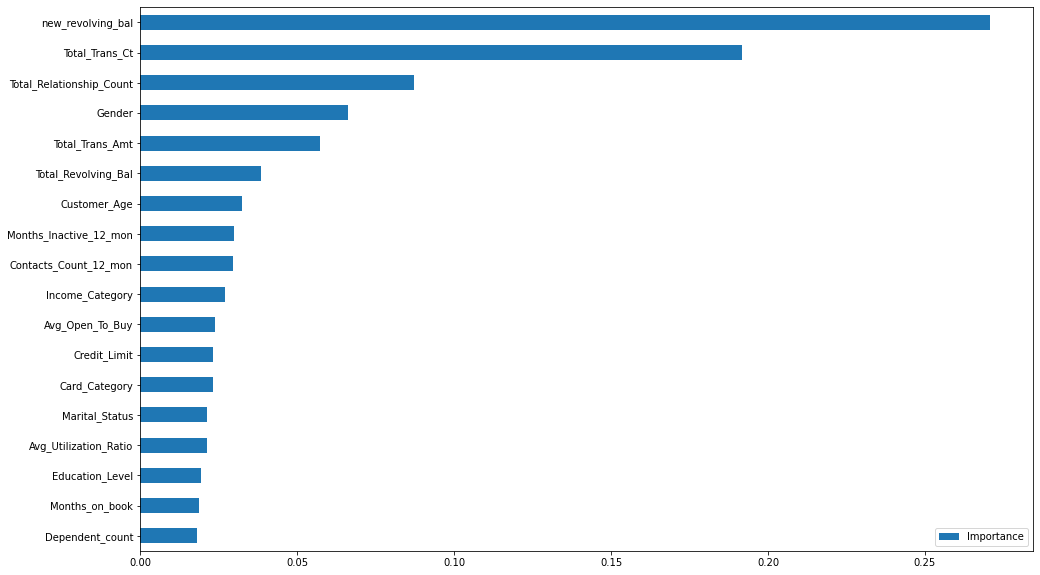

In [48]:
feature_importances = pd.DataFrame(best_model_classifier.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=True)

fig, ax = plt.subplots(figsize=(16, 10))
feature_importances.plot(kind='barh', ax=ax)

Podemos observar que o número total de transações e o saldo rotativo são os maiores indicadores do cancelamento do cliente, e isso pode ser usado pela equipe de negócios para tomar ações para a manutenção do cliente.

## Conclusão
Com a análise de Churn conseguimos entender e prever o churn. Com essas informações, as empresas podem implementar estratégias mais eficazes para reduzir o churn e manter seus clientes satisfeitos. Essas estratégias podem incluir a melhoria do atendimento ao cliente, a personalização dos serviços e a oferta de promoções e descontos para clientes em risco de churn. Além disso, o modelo preditivo pode ser atualizado regularmente à medida que novos dados de clientes são coletados, permitindo que as empresas adaptem suas estratégias de retenção de clientes com base nas mudanças nos padrões de churn.